In [2]:
import pandas as pd
import networkx as nx
import graphviz

In [3]:
df=pd.read_csv('final_new.csv', encoding='utf-8')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3378: DtypeWarning: Columns (56) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [189]:
df.fillna(0, inplace=True)

In [5]:
df['api_group'].value_counts()

Early         71693
Other          1244
Mature          912
Developing      684
Legacy           51
Name: api_group, dtype: int64

In [6]:
early= df[df['api_group']=='Early']
developing= df[df['api_group']=='Developing']
legacy= df[df['api_group']=='Legacy']
mature= df[df['api_group']=='Mature']


In [7]:
data = early.query('api_spec_id == 27514')
data[['api_spec_id', 'info_version','label']]

,api_spec_id,info_version,label
2155,27514,1.0.1,0
2156,27514,2.2.2,major.minor.patch
2158,27514,2.2.2,0
2159,27514,2.2.2,0
2160,27514,2.2.2,0
2161,27514,2.2.2,0
2162,27514,2.2.2,0
2163,27514,2.2.2,0
2164,27514,2.2.2,0
2165,27514,2.2.2,0


In [8]:
early.fillna(0, inplace=True)
developing.fillna(0, inplace=True)
legacy.fillna(0, inplace=True)
mature.fillna(0, inplace=True)

/usr/local/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [9]:
s = early['label'].astype(str).value_counts()
s.drop('0', inplace=True)
s

patch                    3455
minor                     968
minor.patch               663
major.minor.patch         405
major                     215
major.patch               171
pre                       167
major.minor               144
minor.patch.pre            40
minor.pre                  22
dev                        18
patch.pre                  13
minor.dev                  10
minor.patch.dev            10
pre.dev                     7
major.minor.pre             7
major.pre                   6
patch.post                  4
post                        4
minor.pre.dev               4
patch.dev                   3
major.minor.patch.dev       2
major.minor.post            2
major.minor.patch.pre       2
major.patch.post            1
major.minor.dev             1
major.patch.dev             1
major.patch.pre             1
major.post                  1
Name: label, dtype: int64

In [15]:
early.to_csv('early.csv', index=False)

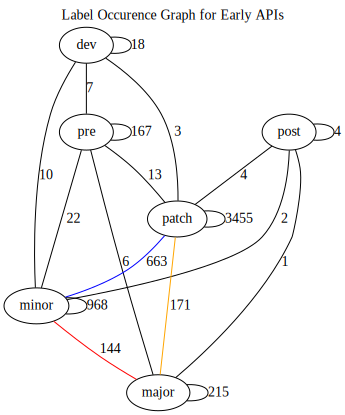

In [10]:
# Network graph of Early APIs

early = early[early['label'] != 0]
s = early['label'].astype(str).value_counts()
s.drop('0', inplace=True)

tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for Early APIs', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot

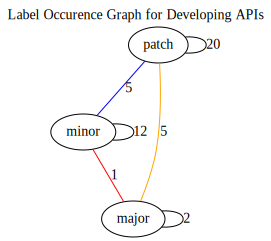

In [17]:
# Network graph of Developing APIs

developing = developing[developing['label'] != 0]
ds = developing['label'].astype(str).value_counts()
ds.drop('0', inplace=True)

tmp = (
    ds.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for Developing APIs', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot

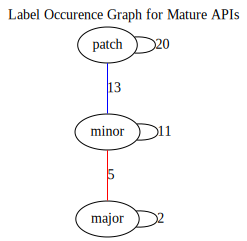

In [20]:
# Network graph of Mature APIs

mature = mature[mature['label'] != 0]
ms = mature['label'].astype(str).value_counts()
ms.drop('0', inplace=True)

tmp = (
    ms.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for Mature APIs', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot

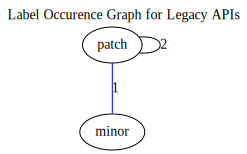

In [21]:
# Network graph of Legacy APIs

legacy = legacy[legacy['label'] != 0]
ls = legacy['label'].astype(str).value_counts()
ls.drop('0', inplace=True)

tmp = (
    ls.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for Legacy APIs', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot

In [190]:
df['commit_date'] = pd.to_datetime(df['commit_date'])

df_2014 = df.loc[df['commit_date'].dt.year == 2014]
df_2015 = df.loc[df['commit_date'].dt.year == 2015]
df_2016 = df.loc[df['commit_date'].dt.year == 2016]
df_2017 = df.loc[df['commit_date'].dt.year == 2017]
df_2018 = df.loc[df['commit_date'].dt.year == 2018]
df_2019 = df.loc[df['commit_date'].dt.year == 2019]
df_2020 = df.loc[df['commit_date'].dt.year == 2020]
df_2021 = df.loc[df['commit_date'].dt.year == 2021]
df_2022 = df.loc[df['commit_date'].dt.year == 2022]

In [191]:
import warnings

warnings.filterwarnings('ignore')

df_2014.fillna(0, inplace=True)
df_2015.fillna(0, inplace=True)
df_2016.fillna(0, inplace=True)
df_2017.fillna(0, inplace=True)
df_2018.fillna(0, inplace=True)
df_2019.fillna(0, inplace=True)
df_2020.fillna(0, inplace=True)
df_2021.fillna(0, inplace=True)
df_2022.fillna(0, inplace=True)

In [47]:
s = df_2016['label'].astype(str).value_counts().dropna()

In [12]:
df.fillna(0, inplace=True)

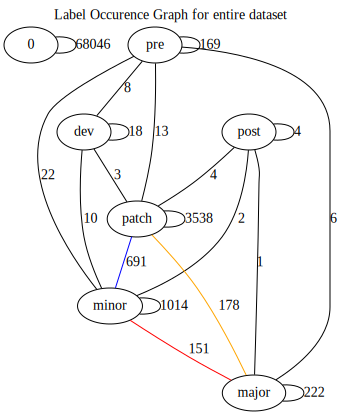

In [13]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df = df[df['label'] != 0]

s = df['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')

dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for entire dataset', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


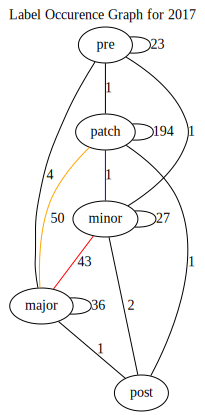

In [197]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2017 = df_2017[df_2017['label'] != 0]

s = df_2017['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')

dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2017', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})

for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))

dot



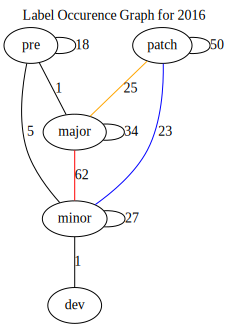

In [199]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2016 = df_2016[df_2016['label'] != 0]

s = df_2016['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('major', 'minor'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2016', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


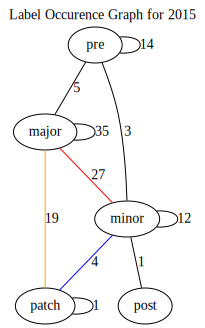

In [200]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2015 = df_2015[df_2015['label'] != 0]

s = df_2015['label'].astype(str).value_counts()

tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('major', 'minor'): 'red', ('minor', 'patch'): 'blue', ('major', 'patch'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2015', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot

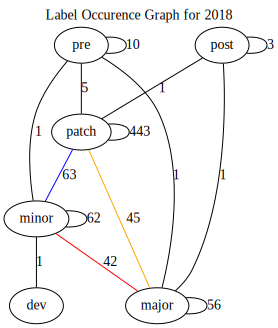

In [201]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2018 = df_2018[df_2018['label'] != 0]

s = df_2018['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2018', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


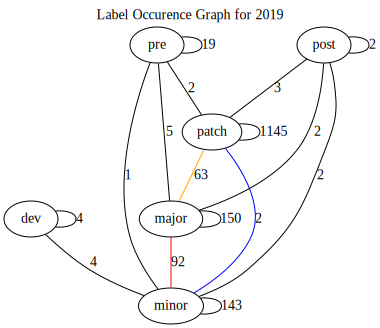

In [202]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2019 = df_2019[df_2019['label'] != 0]

s = df_2019['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('major', 'minor'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2019', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


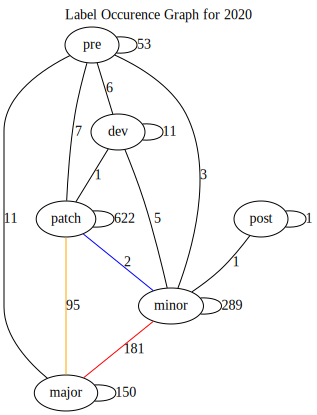

In [203]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2020 = df_2020[df_2020['label'] != 0]

s = df_2020['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2020', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


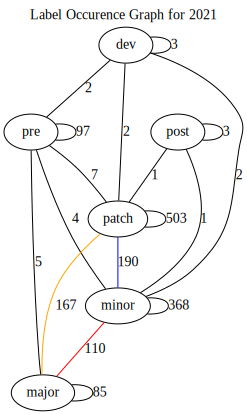

In [204]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2021 = df_2021[df_2021['label'] != 0]

s = df_2021['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2021', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot


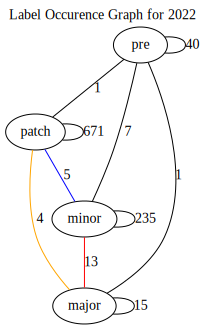

In [205]:
import networkx as nx
import graphviz
import numpy as np
import matplotlib.pyplot as plt

df_2022 = df_2022[df_2022['label'] != 0]

s = df_2022['label'].astype(str).value_counts()


tmp = (
    s.reset_index(name='label')
    .sort_values(by='index', key=lambda s: s.str.count('.'))
    .pipe(lambda d: d.join(d['index'].str.extract(r'(?:([^.]+).)?(\b[^.]+)$').bfill(axis=1)))
    .drop_duplicates(subset=[0, 1])
    .dropna(subset=[0, 1])
)

# Set up the node colors based on their label values
#node_colors = {'major': 'lightblue', 'minor': 'olive', 'patch': 'gray', 'pre': 'beige', 'dev': 'green','post': 'pink', 'prerelease_version': 'orange'}

# Set up the edge colors for major, minor and patch edges
edge_colors = {('minor', 'major'): 'red', ('patch', 'minor'): 'blue', ('patch', 'major'): 'orange'}

G = nx.from_pandas_edgelist(tmp, source=0, target=1,
                            create_using=nx.Graph, edge_attr='label')


dot = graphviz.Graph(graph_attr={'label': 'Label Occurence Graph for 2022', 'labelloc': 't', 'labeljust': 'c', 'labeldistance': '2.0'})
for node in G.nodes:
    dot.node(str(node))

for edge in G.edges:
    label = G.edges[edge]['label']
    # Update the edge color only for major, minor and patch edges
    if (edge[0], edge[1]) in edge_colors:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label), color=edge_colors[(edge[0], edge[1])])
    else:
        dot.edge(str(edge[0]), str(edge[1]), label=str(label))
    
dot
